In [ ]:
# import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv(r"C:\Users\sival\Shiva Reddy\sales_data.csv",sep=",")

In [3]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [4]:
#shape of the dataset
df.shape

(76000, 16)

In [5]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object

In [6]:
#All variable names
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality',
       'Epidemic', 'Demand'],
      dtype='object')

In [7]:
# total number of unique values in the categorical variables
df[['Category','Region','Seasonality','Weather Condition',]].nunique()


Category             5
Region               4
Seasonality          4
Weather Condition    4
dtype: int64

In [8]:
unique_values = {col: df[col].unique().tolist() for col in ['Category', 'Region', 'Seasonality', 'Weather Condition']}
print(unique_values)


{'Category': ['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture'], 'Region': ['North', 'South', 'East', 'West'], 'Seasonality': ['Winter', 'Spring', 'Summer', 'Autumn'], 'Weather Condition': ['Snowy', 'Cloudy', 'Sunny', 'Rainy']}


In [9]:
#Encoding
replacement_category={'Electronics':1, 'Clothing':2, 'Groceries':3, 'Toys':4, 'Furniture':5}
replacement_Region= {'North':1, 'South':2, 'East':3, 'West':4}
replacement_Seasonality= {'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4}
df["Category"] = df["Category"].replace(replacement_category)
df["Region"] = df["Region"].replace(replacement_Region)
df["Seasonality"] = df["Seasonality"].replace(replacement_Seasonality)

C:\Users\sival\AppData\Local\Temp\ipykernel_28724\1384239606.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"] = df["Category"].replace(replacement_category)
C:\Users\sival\AppData\Local\Temp\ipykernel_28724\1384239606.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Region"] = df["Region"].replace(replacement_Region)
C:\Users\sival\AppData\Local\Temp\ipykernel_28724\1384239606.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [10]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category                int64
Region                  int64
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality             int64
Epidemic                int64
Demand                  int64
dtype: object

In [11]:

df.Date=pd.to_datetime(df['Date'],errors='coerce')

In [12]:
df.dtypes

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                       int64
Region                         int64
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Price                        float64
Discount                       int64
Weather Condition             object
Promotion                      int64
Competitor Pricing           float64
Seasonality                    int64
Epidemic                       int64
Demand                         int64
dtype: object

In [13]:
df.isnull().sum()   #No missing values

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [14]:
#Removing unused variables
df.drop(['Store ID', 'Product ID','Weather Condition','Date'], axis=1, inplace=True)  #drop the unwanted variables


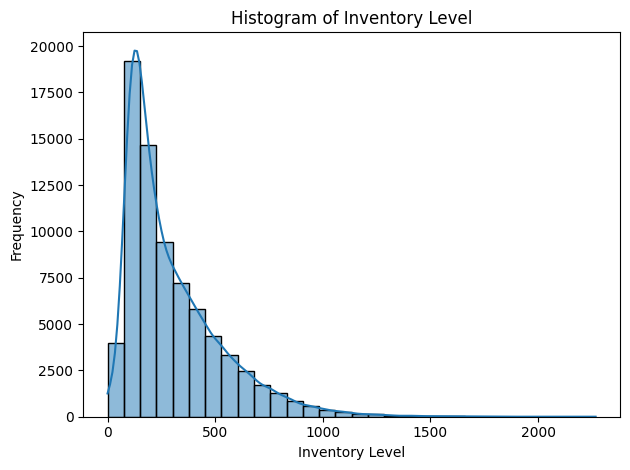

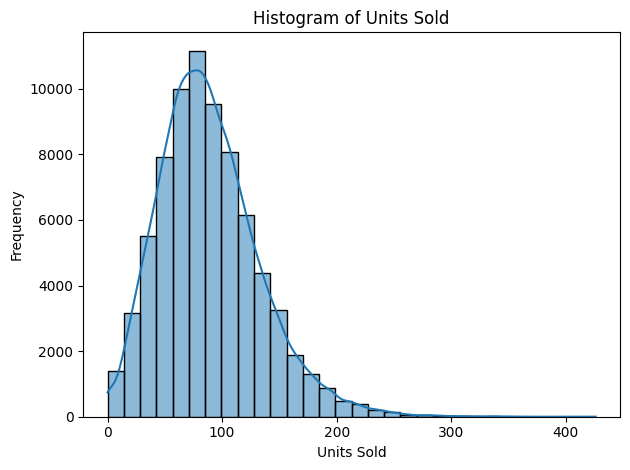

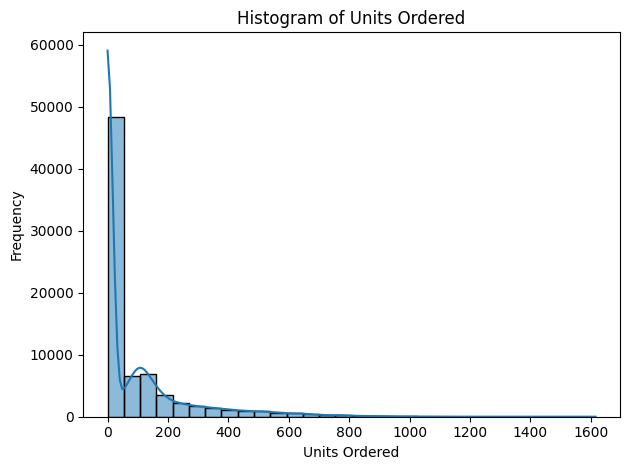

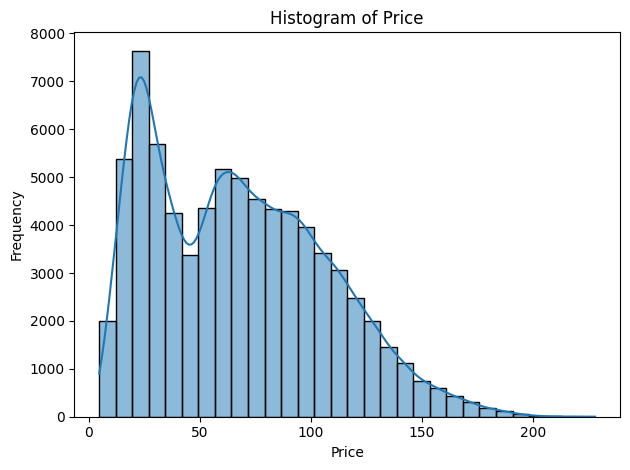

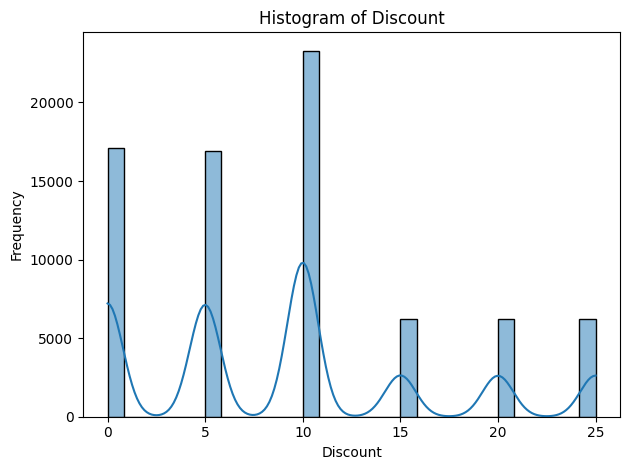

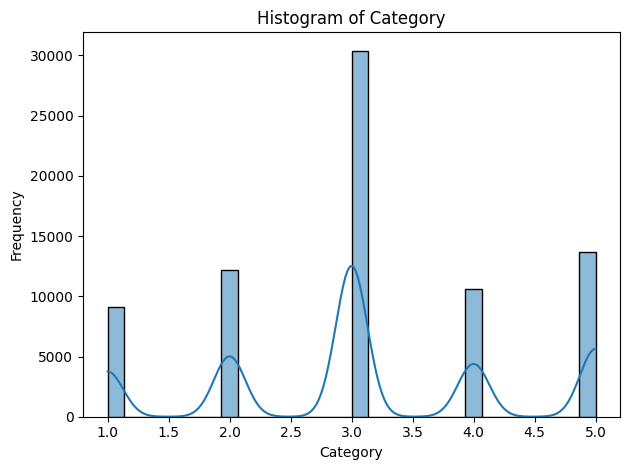

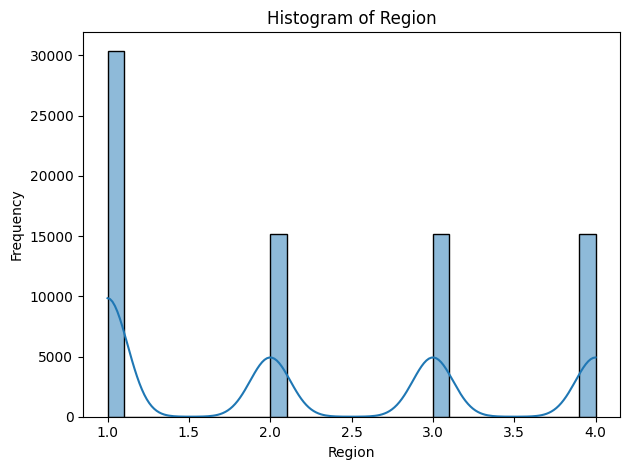

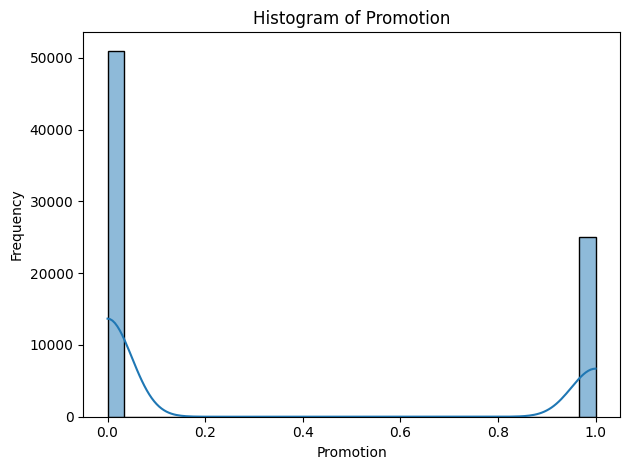

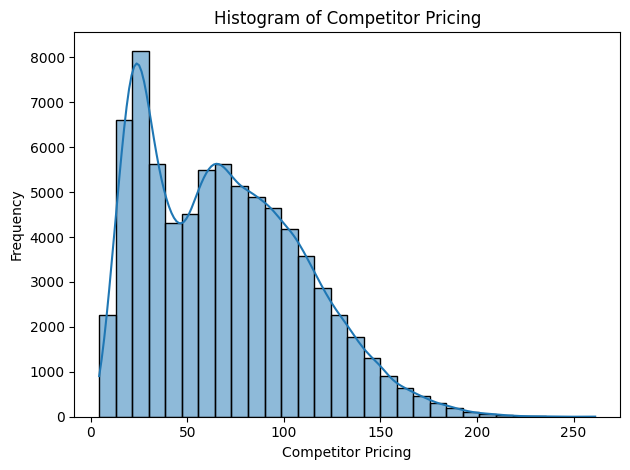

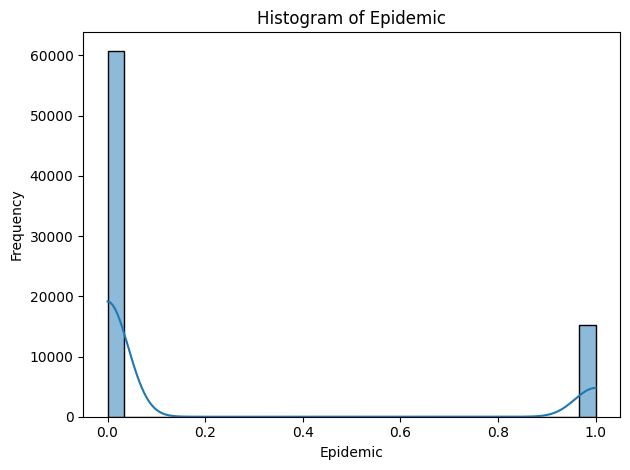

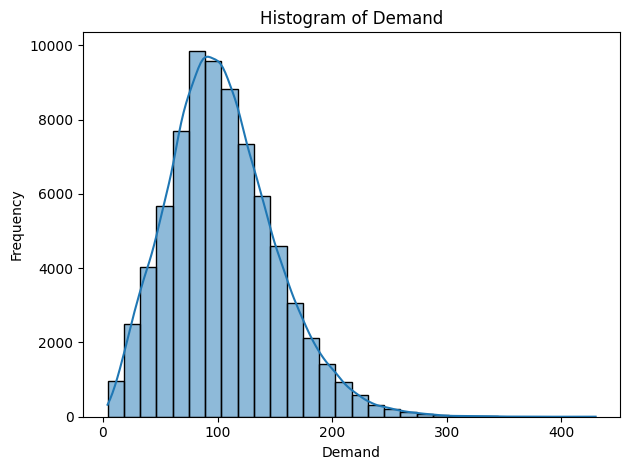

In [17]:
#Histogram for Numeric Variables
cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount','Category','Region', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Demand']
for col in cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

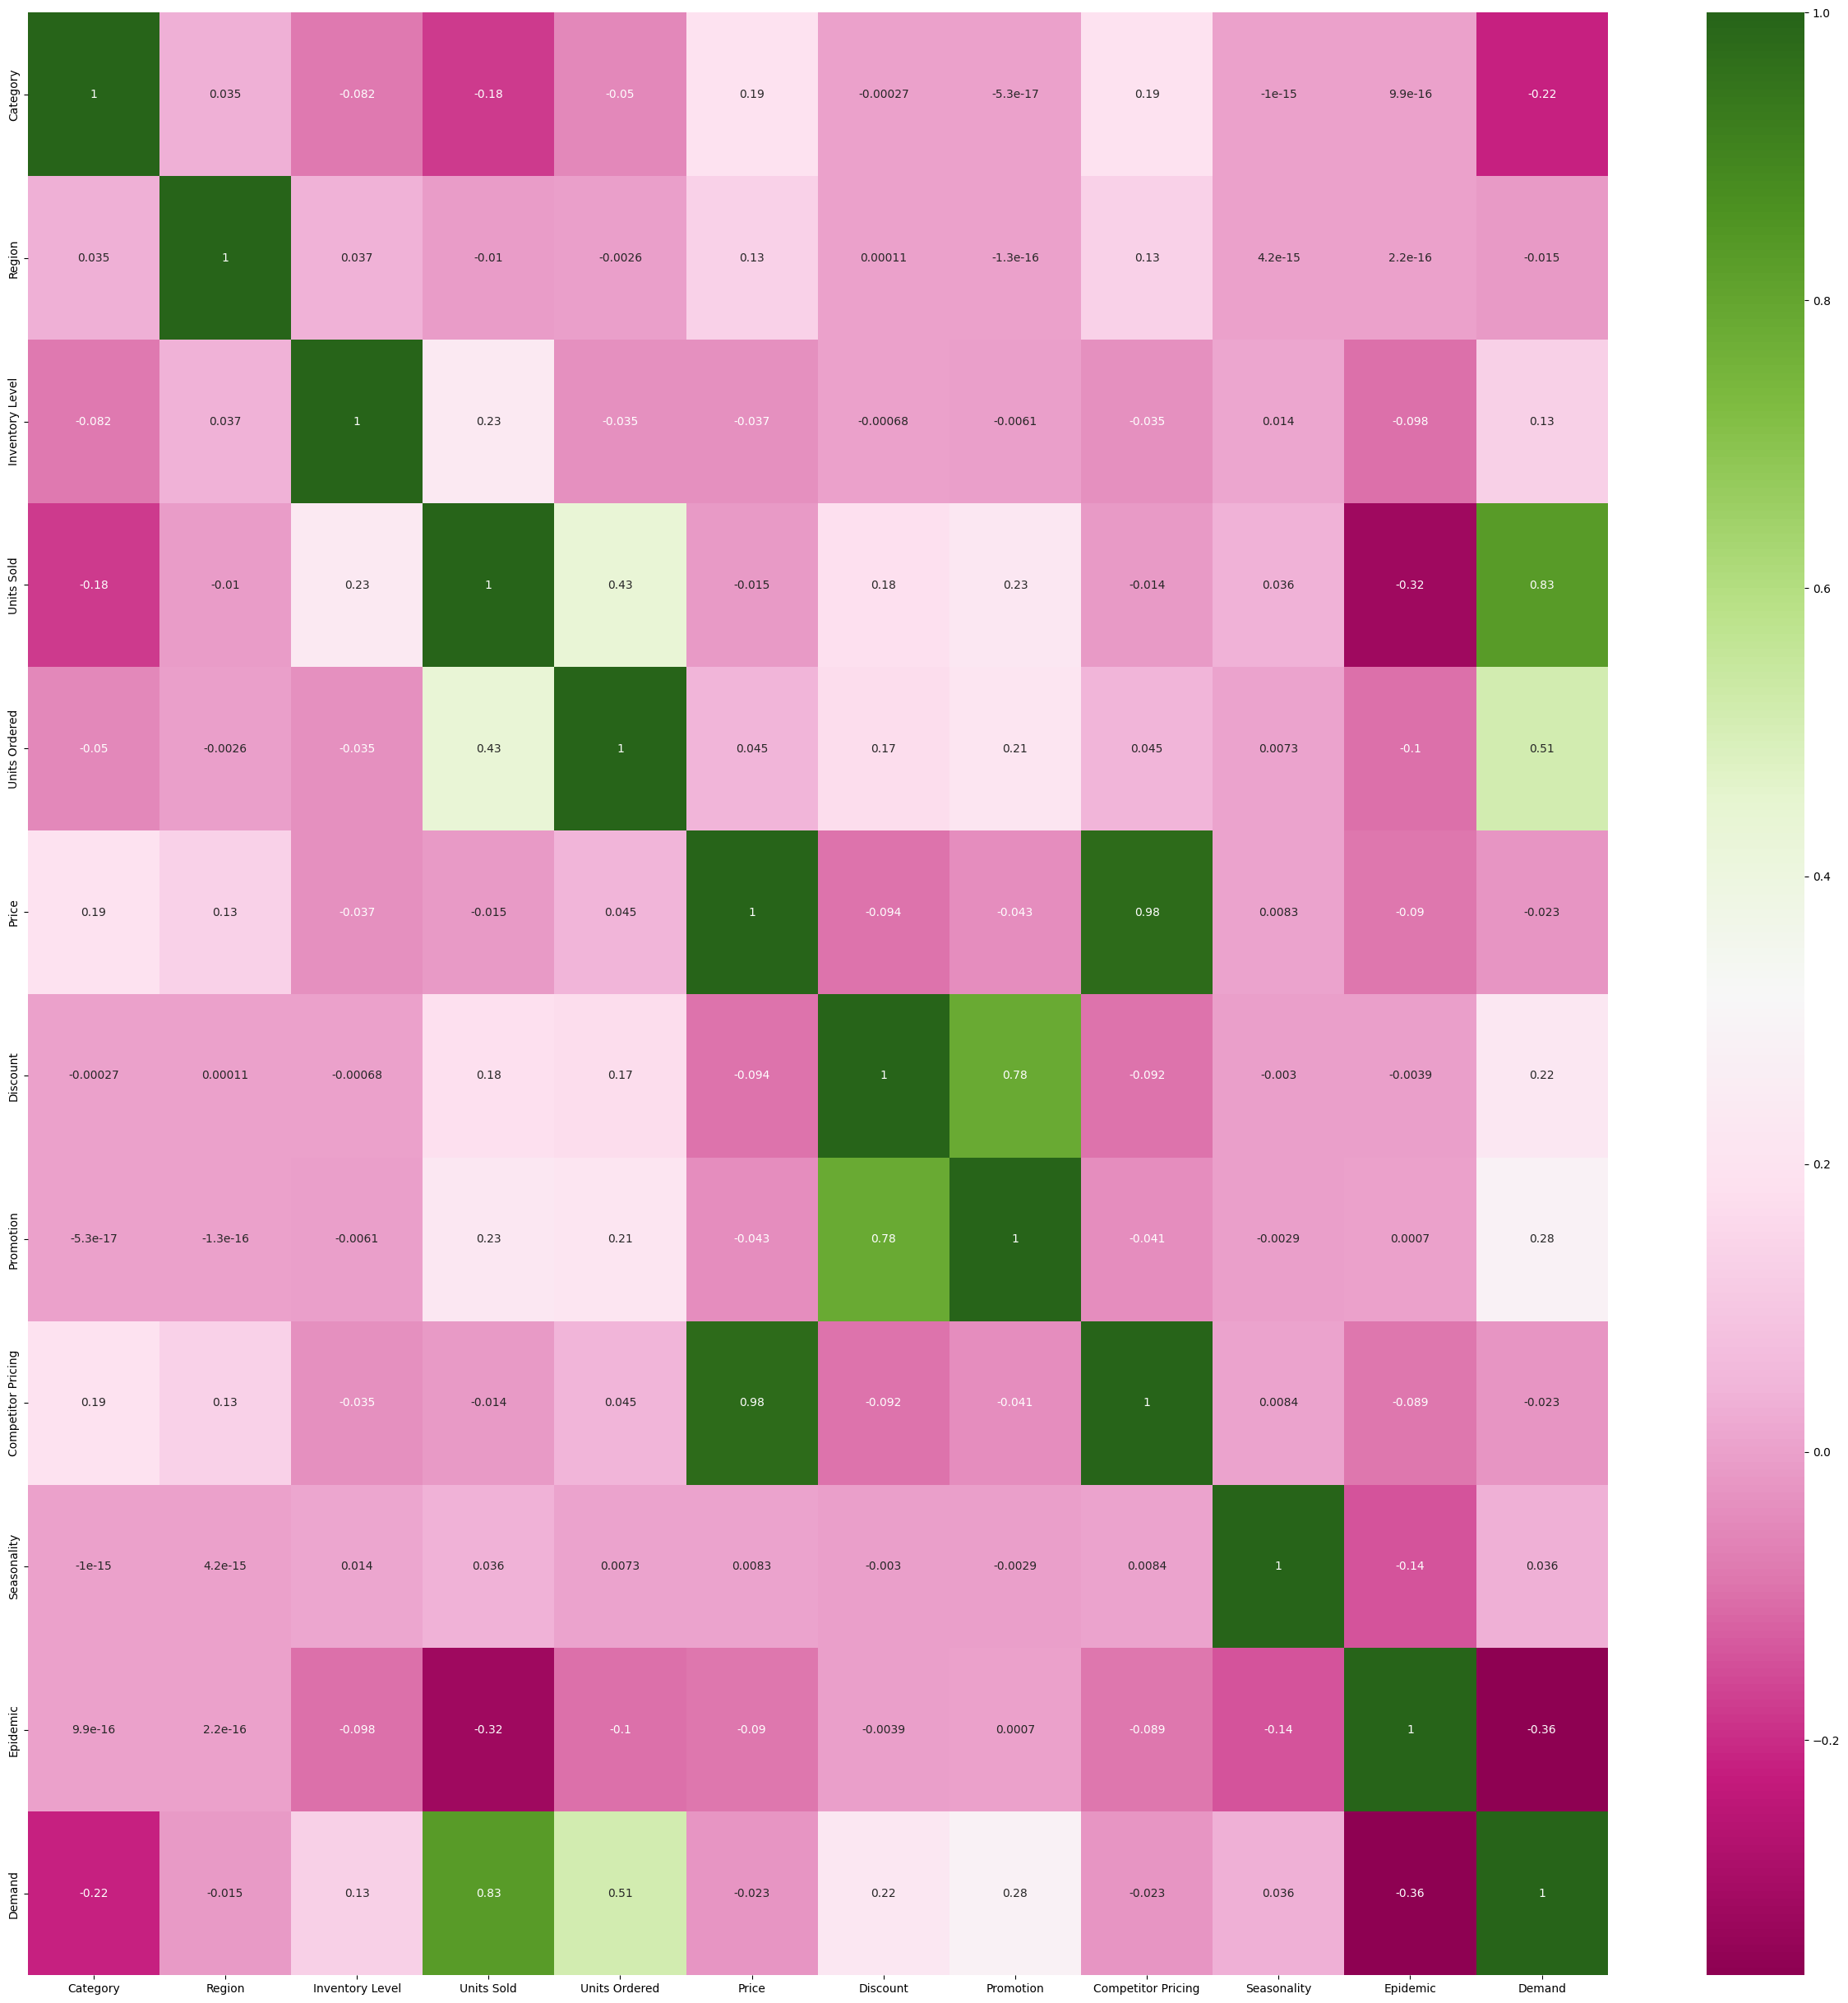

In [16]:
#HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(31,31))
sns.heatmap(df.corr(),annot=True,cmap='PiYG');

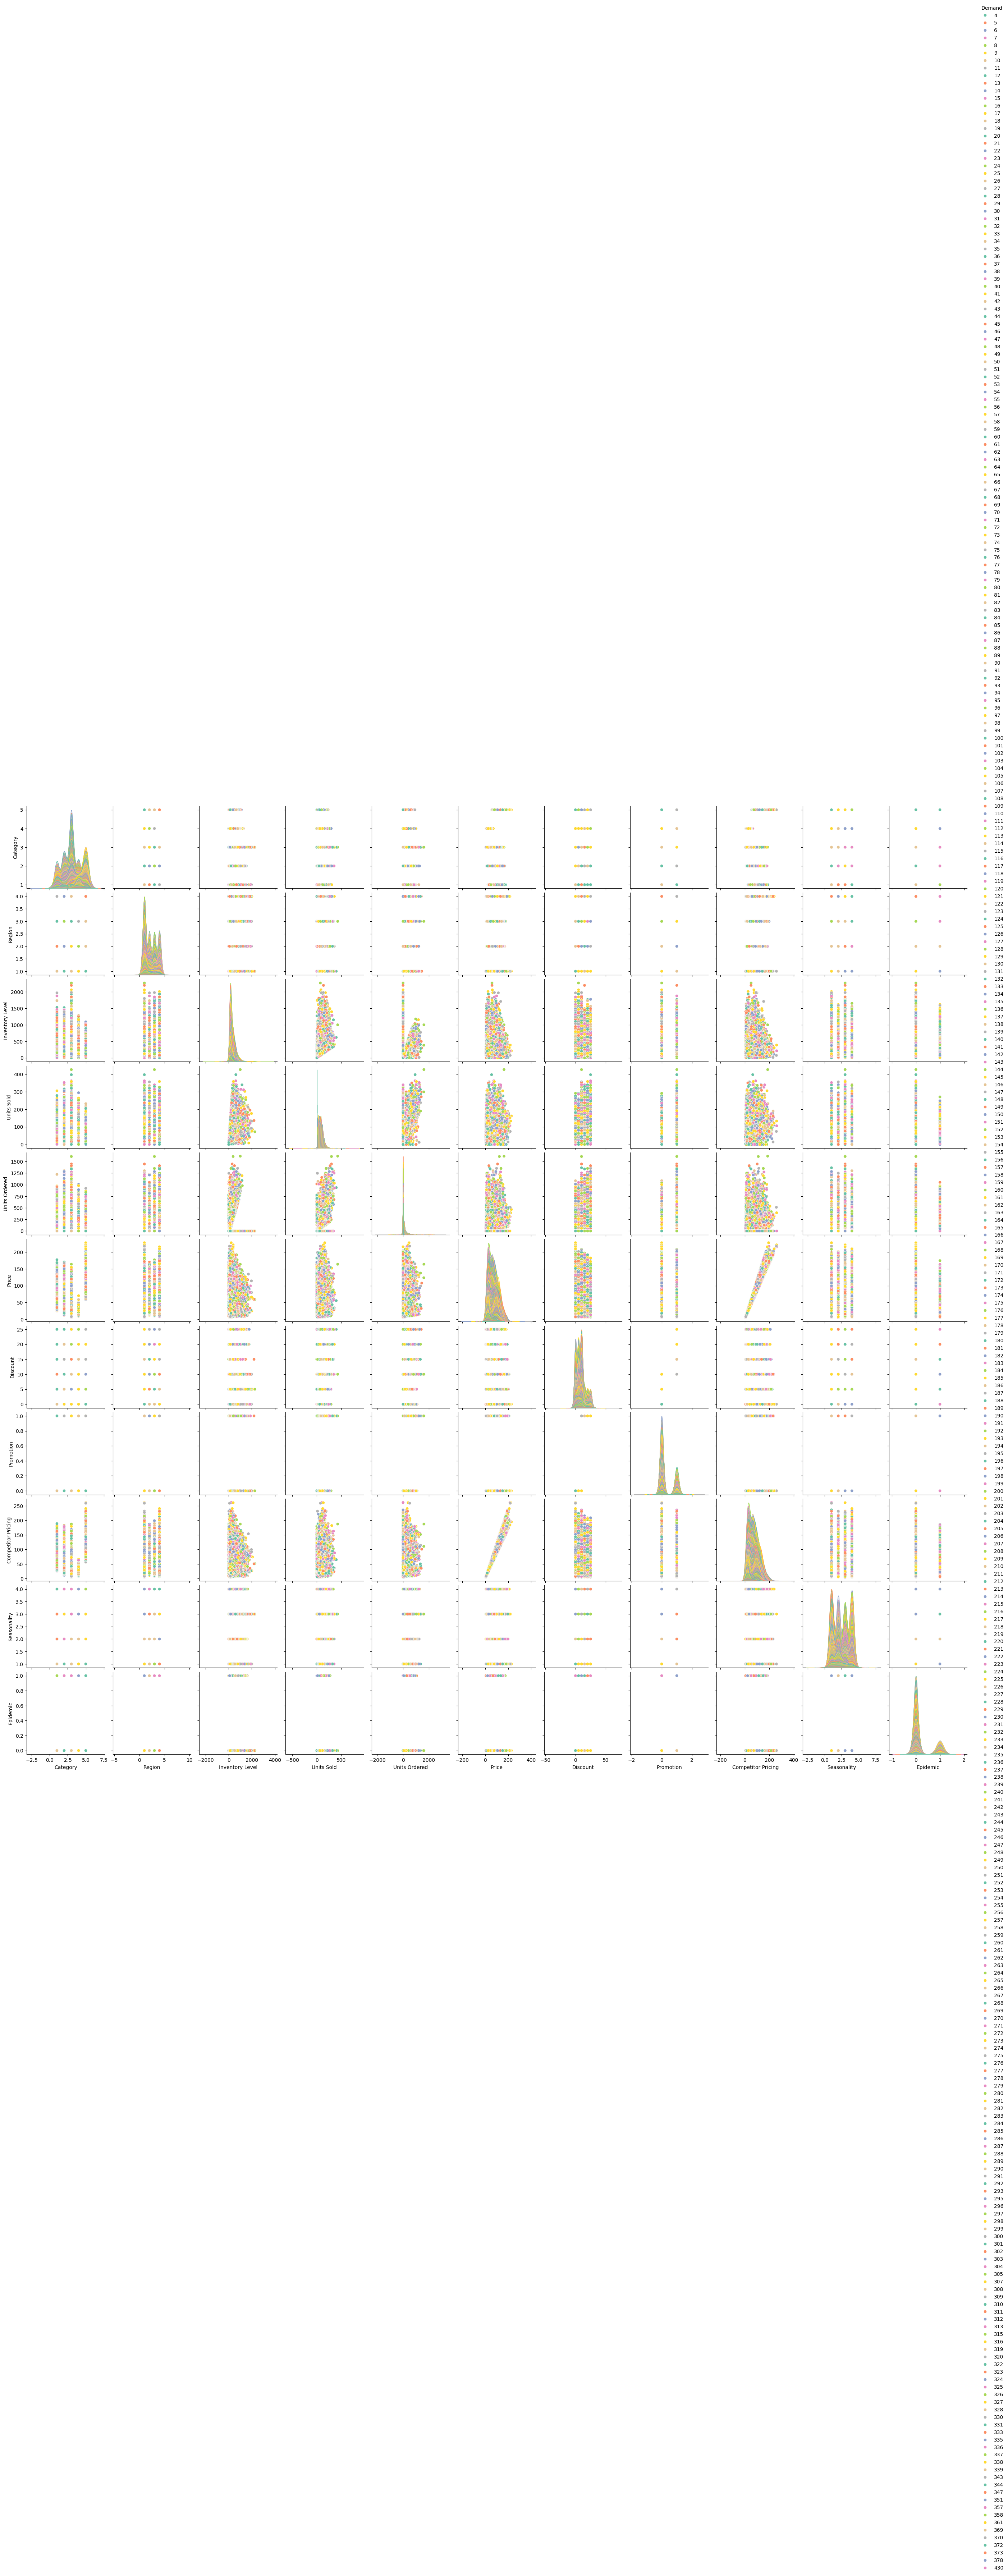

In [18]:
## Correlation Heatmap
sns.pairplot(df, hue='Demand',palette='Set2')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
## Prepare the features and target
X = df.drop(['Demand'], axis=1)
y = df['Demand']




In [ ]:
X

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Seasonality,Epidemic
0,2022-01-01,1,1,195,102,252,72.72,5,0,85.73,1,0
1,2022-01-01,2,1,117,117,249,80.16,15,1,92.02,1,0
2,2022-01-01,2,1,247,114,612,62.94,10,1,60.08,1,0
3,2022-01-01,1,1,139,45,102,87.63,10,0,85.19,1,0
4,2022-01-01,3,1,152,65,271,54.41,0,0,51.63,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,4,1,233,63,0,29.80,5,0,32.23,1,0
75996,2024-01-30,4,1,137,115,141,42.92,5,0,40.73,1,0
75997,2024-01-30,2,1,197,44,0,17.81,10,0,19.41,1,0
75998,2024-01-30,5,1,125,58,0,151.72,0,0,143.71,1,0


In [ ]:
y

0        115
1        229
2        157
3         52
4         59
        ... 
75995     64
75996    137
75997     68
75998     84
75999     73
Name: Demand, Length: 76000, dtype: int64

In [23]:
# Split into train and test sets
# Initialize and fit the Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
X_train.describe

<bound method NDFrame.describe of        Category  Region  Inventory Level  Units Sold  Units Ordered  Price  \
58752         3       3               46          46              0  81.82   
54826         4       2              642         122              0  29.56   
10506         3       1              609          81              0  18.05   
48551         5       3              142          27             79  82.01   
36925         2       2              126          94            132  68.32   
...         ...     ...              ...         ...            ...    ...   
37194         3       1              264         222            407  58.78   
6265          3       4              232         135              0  38.15   
54886         3       1               56          56            360  91.77   
860           3       4              626         126            676  14.34   
15795         4       1              400          60              0  33.08   

       Discount  Promotion  C

In [ ]:
# Evaluation and prediction
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

In [ ]:
pred

array([100.36,  81.71,  39.23, ..., 157.97, 101.05,  92.75],
      shape=(22800,))

In [ ]:
r2

0.8657925984618783

In [ ]:
mse

295.6552542236842

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df.columns


Index(['Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Seasonality',
       'Epidemic', 'Demand'],
      dtype='object')

In [ ]:
cols

['Inventory Level',
 'Units Sold',
 'Units Ordered',
 'Price',
 'Discount',
 'Promotion',
 'Competitor Pricing',
 'Epidemic',
 'Demand']

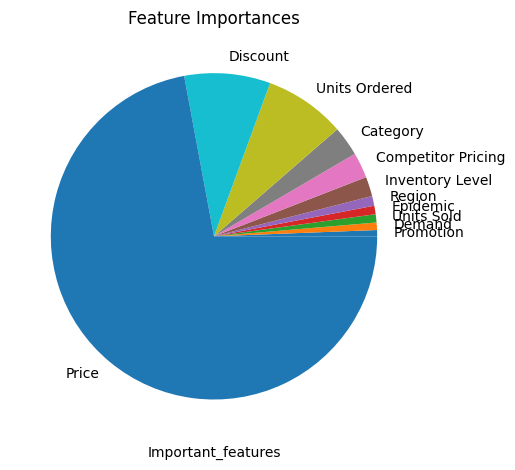

In [24]:
important_features = model.feature_importances_
features = pd.Series(important_features, index=cols).sort_values()

plt.figure()
features.plot(kind='pie')
plt.title('Feature Importances')
plt.xlabel('Important_features')
plt.tight_layout()
plt.show()